# Statistique descriptive
## Définitions
Dans la suite, nous nous intéressons à des unités statistiques ou individus statistiques ou unités d'observation (individus,  entreprises,  ménages, données abstraites...). Bien que le cas infini soit envisageable, nous nous restreignons ici à l'étude d'un nombre fini de ces unités. Un ou plusieurs caractères (ou variables) est mesuré sur chaque unité. Les variables sont désignées par simplicité par une lettre. Leurs valeurs possibles sont appelées modalités et l'ensemble des valeurs possibles ou des modalités est appelé le domaine. L'ensemble des individus statistiques forme la population.
### Typologie des variables
La typologie des variables définit le type de problème statistique que l'on doit aborder :

```{index} Variable ; qualitative
```
````{prf:definition} Variable qualitative
La variable est dite qualitative lorsque les modalités sont des catégories. Suivant qu'il existe une relation d'ordre sur les catégories, on distingue :
- la variable qualitative nominale, si les modalités  ne peuvent pas être ordonnées
- la variable qualitative ordinale, si les modalités peuvent être ordonnées
````

```{index} Variable ; quantitative
```
````{prf:definition} Variable quantitative
La variable est dite quantitative lorsque les modalités sont des valeurs numériques (scalaires ou vectorielles) :
- la variable est quantitative discrète si les modalités forment un ensemble dénombrable
- la variable quantitative est continue si les modalités vivent dans un espace continu.
````

Dans certains cas (l'âge par exemple), une variable d'un type (quantitative continue ici) peut être exprimée d'une autre manière pour des raisons pratiques de collecte ou de mesure. De même, les variables qualitatives ordinales peuvent être codées, par exemple selon une échelle de satisfaction.

```{index} Statistique ; série
```
````{prf:definition} Série statistique
On appelle série statistique une suite de $n$ valeurs prises par une variable $X$ sur les unités d'observation, notées $x_1\cdots x_n$.
````


### Variable qualitative nominale
```{index} Variable ; qualitative ; nominale
```
Une variable qualitative nominale a des valeurs distinctes qui ne peuvent pas être ordonnées. On note $J$ le nombre de valeurs distinctes ou de modalités, notées $x_1\cdots x_J$. On appelle effectif d'une modalité ou d'une valeur distincte le nombre de fois que cette modalité (ou valeur distincte) apparaît dans la série statistique. On note $n_j$ l'effectif de la modalité $x_j$. La fréquence d'une modalité $j$ est  alors égale à $f_j=\frac{n_j}{n}$.

Le tableau statistique d'une variable qualitative nominale peut être représenté par deux types de graphiques. Les effectifs sont représentés par un diagramme en tuyau d'orgue et les fréquences par un diagramme en secteurs. Pour ce dernier, si le nombre de modalités devient trop important, la représentation perd de son intérêt.

![](./images/baton.png)


### Variable qualitative ordinale
```{index} Variable ; qualitative ; ordinale
```
Le domaine peut être muni d'une relation d'ordre.  Les valeurs distinctes d'une variable ordinale peuvent donc être ordonnées $x_1\leq x_2\cdots\leq  x_J$, à permutation près dans l'ordre croissant des indices. L'effectif cumulé $N_j$ et la fréquence cumulée $F_j$ des variables sont alors définis par 
$(\forall j\in[\![1,J]\!])\quad N_j=\displaystyle\sum_{i=1}^j n_i\quad \textrm {et}\quad F_j=\displaystyle\sum_{i=1}^j f_i$

Les fréquences et les effectifs (cumulés ou non) peuvent être représentés sous la forme d'un diagramme en tuyaux d'orgue.

### Variable quantitative discrète
```{index} Variable ; quantitative ; discrète
```
Le domaine d'une telle variable est dénombrable. Comme pour les variables qualitatives ordinales, on peut calculer les effectifs (cumulés ou non) et les fréquences (cumulées ou non). 

La répartition des valeurs de la variable peut être représentée par un diagramme en bâtonnets. Les fréquences cumulées  sont visualisées par la fonction de répartition de la variable , définie par 

$F(x) = \left \{
\begin{eqnarray}
0&\textrm{ si} &x<x_1\\
F_j &\textrm{ si}&  x\in[x_j,x_{j+1}[\\
1& \textrm{ si}&  x_J\leq x
\end{eqnarray}\right .$

![](./images/baton2.png)

### Variable quantitative continue
```{index} Variable ; quantitative ; continue
```
Le domaine d'une  variable quantitative continue est infini et est assimilé à $\mathbb{R}$ ou à un intervalle de $\mathbb{R}$. Cependant, la mesure étant limitée en précision, on peut traiter ces variables comme des variables discrètes.

La représentation graphique de ces variables (et la construction du tableau statistique) passe par le regroupement des modalités ou valeurs en classes. Le tableau ainsi construit est souvent appelé distribution groupée. La classe $j$ est l'ensemble des valeurs incluses dans $[c^-_j,c^+_j[$, où $c^-_j$ et $c^+_j$ sont les bornes inférieure et supérieure de la classe. Sur cet intervalle, on peut calculer la fréquence $f_j$ de la classe, la fréquence cumulée, l'effectif $n_j$... La répartition en classes nécessite de définir a priori le nombre de classes $J$ et l'amplitude $a_j$ des intervalles. Si elles peuvent être définies de manière empirique, quelques règles permettent d'établir $J$ et l'amplitude pour une série statistique de $n$ observations. Par exemple :
- $J=1+3.3log_{10}(n)$ (règle de Sturge)
- $J=2.5\sqrt[4\,]{n}$ (règle de Yule)

La représentation graphique se fait par exemple par histogramme. 
Les histogrammes sont des représentations de la distribution des données, agrégées par intervalles. A partir de l'étendue des données, on subdivise l'intervalle en $k$ bins, de tailles $t_k$ non nécessairement identiques, et on compte le nombre d'individus $n_k$ rentrant dans chaque bin. L'histogramme peut alors être :
- non normalisé : $h_k = n_k$
- normalisé: $h_k = n_k/t_k$

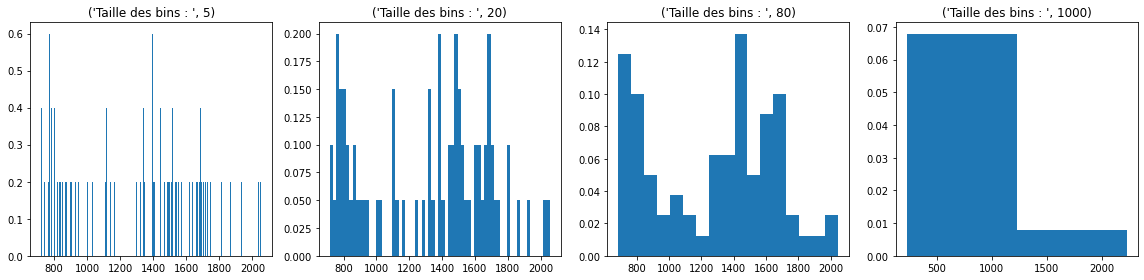

In [1]:
import numpy as np
import matplotlib.pyplot as plt
X = np.loadtxt("./data/data.csv", delimiter=",")[:,1]

# Comptage des individus
def count(X, bins):
    def findBin(x, bins):
        for i, bin in enumerate(bins):
            left, right = bin
            if left <= x and x < right:
                return i
        return None
    
    count = [0] * len(bins)
    for x in X:
        i = findBin(x, bins)
        if i != None:
            count[i] += 1

    return count

        
# Affichage de l'histogramme
def plot_hist(X,  bin_min, bin_max, bin_width,normed=True):
    bins =[ [i, i+bin_width] for i in np.arange(bin_min, bin_max, bin_width) ]
    bin_left = [ l for l, r in bins ]
    bin_widths = [ r-l  for l,r in bins ]
    bin_height = [ 
        float(c) / w if normed else c 
        for c,w in zip(count(X, bins), bin_widths)
    ]
    plt.bar(bin_left,width=bin_width,height=bin_height)
    plt.tight_layout()

bin_min = min(X)
bin_max = max(X)

plt.figure(figsize=(16, 4))
for subplot, binsize in ((141, 5),(142, 20), (143, 80), (144, 1000)):
    title = 'Taille des bins : ', binsize
    plt.subplot(subplot)
    plt.title(title, fontsize=12)
    plot_hist(X, bin_min, bin_max, binsize)


Le choix de la largeur $t$ des bins dépend des données, et par exemple on a : 
- Loi de Scott : $t = \frac{3.5 \sigma}{Card(X)^{1/3}}$, où $\sigma$ est l'écart type des données.
- Loi de Freedman–Diaconis : $ t = \frac{2 IQR}{Card(X)^{1/3}}$, où $IQR$ est la distance interquartile.
  



```{prf:remark}
:class: dropdown
Toutes les classes n'ont pas nécessairement la même amplitude
```

Les effectifs (ou les fréquences) sont représenté(e)s par un histogramme. Si l'on s'intéresse à la représentation des effectifs (resp. des fréquences), la densité d'effectif $h_j$ (resp. de fréquence $d_j$),  définie par $h_j=\frac{n_j}{a_j}$ (resp. $d_j=\frac{f_j}{a_j}$), détermine la hauteur du rectangle représentant la classe $j$. L'aire de l'histogramme est égale à l'effectif total $n$ pour l'histogramme des effectifs, et à 1 pour l'histogramme des fréquences.

Comme dans le cas discret, la fonction de répartition peut être calculée de la manière suivante :

$F(x) = \left \{
\begin{eqnarray}
0&\textrm{ si}& x<c^-_1\\
F_{j-1}+\frac{f_j}{c^+_j-c^-_j}(x-c^-_j) &\textrm{ si}& x\in[c^-_j,c^+_j[\\
1& \textrm{ si}&c^+_J\leq x
\end{eqnarray}\right .$


## Pré-traitement des données

Faire une analyse de données, c'est traiter un tableau de taille $n\times d$ où $n$ est le nombre d'individus et $d$ le nombre de variables (caractères) mesurées sur ces individus. En raison de la colecte des données, des erreurs de mesure ou d'autres facteurs, ce tableau est parfois incomplet et il convient de le prétraiter pour pouvoir effectuer l'analyse.

### Points aberrants
Une anomalie (ou point aberrant, ou outlier) est une observation (ou un sous-ensemble d'observations) qui semble incompatible avec le reste de l'ensemble de données.

S'il est parfois possible d'identifier graphiquement ces points aberrants à l'aide de boîtes à moustaches (voir {ref}`boxplot`), il existe une vaste littérature sur la détection d'anomalies qu'il n'est pas possible d'aborder ici. De plus, suivant le type de données manipulées (données séquentielles ou non), le type de méthode peut être différent. On mentionne donc ici quelques techniques simples :

- le détecteur de Hampel : on considère que $x_i$ est un point aberrant si 

$$|x_i-x_{\frac12}|>3.MADM$$ 

où $MADM = 1.4826.|x_i-x_{\frac12}|_\frac12$, et où $y_{\frac12}$ est la médiane des données $y$ 
- la règle empirique de l'écart-type : on considère que $x_i$ est un point aberrant si 

$$|x_i-\bar x|>3.\sigma$$

où  $\bar x$ (respectivement $\sigma$) est la moyenne (resp. l'écart-type ) des données.
- la méthode LOF (Local Outlier Factor) qui repose sur le concept de densité locale, où la localité est donnée par les $k$ voisins les plus proches, dont la distance est utilisée pour estimer la densité. En comparant la densité locale d'un objet aux densités locales de ses voisins, il est possible d'identifier des régions de densité similaire et des points dont la densité est nettement inférieure à celle de leurs voisins. Ces derniers sont considérés comme des valeurs aberrantes. La densité locale est estimée par la distance typique à laquelle un point peut être atteint à partir de ses voisins. 
- la méthode COF (Connectivity based Outlier Factor) basée sur le même principe que LOF, à ceci près que l'estimation de densité est effectuée en utilisant le minimum de la somme des distances reliant tous les voisins d'un point donné.



Dans le code suivant, 7 anomalies sont introduites dans un jeu de données dans le plan, et détectées par la méthode LOF. Le score d'anomalie calculé par la méthode est proportionnel au cercle entourant le point. Les faux positifs (points de données détectés par LOF comme étant des anomalies) sont reportés en rouge.

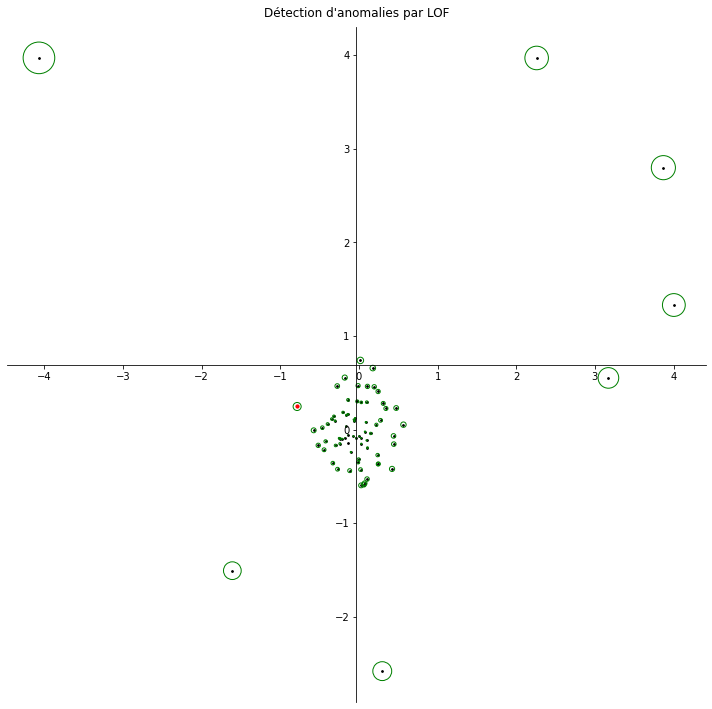

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X1 = 0.3 * np.random.randn(70, 2)
X2 = np.random.uniform(low=-5, high=5, size=(7, 2))
X = np.r_[X1, X2]

anom = np.ones(len(X), dtype=int)
anom[-len(X2):] = -1

from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
err = y_pred != anom
n_errors = (err).sum()
X_scores = clf.negative_outlier_factor_
X3 = X[err==True]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0)
plt.scatter(X3[:,0],X3[:,1],color='r',s=10)
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
scatter = plt.scatter(X[:, 0],X[:, 1],s=1000 * radius,edgecolors="g",facecolors="none",)
plt.suptitle("Détection d'anomalies par LOF")
plt.tight_layout()
plt.show()

### Données manquantes
Lors de la collecte des données, il arrive que certaines d'entre elles ne soient pas disponibles ou enregistrées. On distingue trois types de données manquantes :

1. les données manquant de manière complètement aléatoire :  la probabilité qu'une donnée soit manquante ne dépend pas des valeurs connues ni de la valeur manquante elle-même.
2. les données manquant de manière aléatoire :  la probabilité qu'une donnée soit manquante peut dépendre de valeurs connues (d'autres variables parmi les $d$), mais pas de la variable dont les valeurs sont manquantes.
3. les données manquant de manière non aléatoire : la probabilité qu'une donnée soit manquante dépend d'autres variables qui ont également des valeurs manquantes, ou elle dépend de la variable elle-même.


Pour résoudre ce problème de données manquantes, dans la mesure où ces dernières ne sont pas trop nombreuses, on a recours à des techniques d'**imputation**.

Dans le cas d'une imputation simple (une seule donnée manquante), on peut par exemple remplacer la valeur manquante dans une colonne $j\in[\![1,p]\!]$ par :

-  une valeur fixe
-  une statistique sur la colonne $j$ (la plus petite ou la plus grande valeur, la moyenne de la colonne, la valeur la plus fréquente...)
-  une valeur issue des $k$ plus proches voisins de la ligne du tableau où la valeur en position $j$ est manquante
-  une valeur calculée par régression (voir chapitre correspondant) sur l'ensemble du tableau
-  la valeur précédente (ou suivante) dans le cas où la colonne est une série ordonnée ou temporelle.


Le code suivant remplace les valeurs manquantes (\texttt{np.nan}) par la moyenne de la colonne qui contient ces valeurs.

In [3]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X = [[1, 2], [np.nan, 3], [4, 5]]
print(imp.fit_transform(X))

[[1.  2. ]
 [2.5 3. ]
 [4.  5. ]]


Dans le cas d'une imputation multiple, où un sous-ensemble de valeurs doit être comblé, on peut adopter la stratégie suivante : 

1. Effectuer une imputation simple pour toutes les valeurs manquantes de l'ensemble de données.
2. Remettre les valeurs manquantes d'une variable $j\in[\![1,p]\!]$ à "manquante".
3. Former un modèle pour prédire les valeurs manquantes de $j$ en utilisant les valeurs disponibles de la variable $j$ en tant que variable dépendante et les autres variables de l'ensemble de données comme indépendantes.
4. Prédire les valeurs manquantes dans la colonne $j$ en utilisant le modèle entraîné à l'étape 3.
5. Répéter les étapes 2 à 4 pour toutes les autres colonnes présentant des valeurs manquantes.
6. Répéter l'étape 2-5 jusqu'à convergence (ou un nombre maximal d'itérations)
7. Répéter les étapes 1-6 plusieurs fois avec différentes initialisations de nombres aléatoires pour créer différentes versions de l'ensemble de données complet/imputé.

In [4]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=5, random_state=0)
X = [[1, 2], [3, 6], [4, 8], [np.nan, 3], [7, np.nan]]
print((imp.fit_transform(X)))

[[ 1.          2.        ]
 [ 3.          6.        ]
 [ 4.          8.        ]
 [ 1.50004509  3.        ]
 [ 7.         14.00004135]]


### Transformation des données qualitatives
Pour pouvoir être traitées numériquement, les données qualitatives doivent être transformées. Plusieurs techniques existent parmi lesquelles :

- pour le cas des variables ordinales : on utilise le rang pour encoder les modalités de la variable. Par exemple, pour un niveau de diplomation Brevet$<$Bac$<$Licence$<$Master$<$Doctorat, on codera Licence par 3 et Doctorat par 5.
-  le one-hot encoding : pour une variable qualitative présentant $J$ modalités, on construit un vecteur de taille $J$ dont les composantes sont toutes nulles sauf la $J$-ème qui vaut 1. Par exemple, si $J$=3, on construit 1 vecteur de taille 3, et pour un individu ayant la modalité 2, on le code en (0 1 0). Lorsque $J$ est élevé, on se retrouve avec un jeu de données volumineux.
-  les méthodes de plongement (embedding) : utilisées principalement en apprentissage profond (Deep learning) pour le traitement du langage naturel, ces classes de méthodes construisent une représentation de chaque modalité d'une variable qualitative en un vecteur numérique de taille fixe et choisie. Pour le mot "rouge" de la variable "couleur", par exemple, l'encodage peut par exemple être représenté par le vecteur (0.31 0.57 0.12). En pratique, le calcul de ces représentations s'effectue classiquement par l'entraînement d'un réseau de neurones ayant pour entrée uniquement les variables qualitatives. Tout d'abord, un encodage one-hot est appliqué à la variable afin d'être mise en entrée du réseau, qui n'accepte que les entrées numériques. La sortie d'une des couches cachées du réseau constitue alors le vecteur recherché. On concatène ensuite ce vecteur aux données initiales, utilisées dans l'ajustement du modèle final.

In [5]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
import numpy as np
X = [['Rouge'],['Vert'],['Rouge'],['Bleu']]
ohe = OneHotEncoder()
oe = OrdinalEncoder()
print("Données : \n",X)
print("One Hot Encoder : \n", ohe.fit_transform(X).toarray())
print("Ordinal Encoder : \n", oe.fit_transform(np.array(X)))

Données : 
 [['Rouge'], ['Vert'], ['Rouge'], ['Bleu']]
One Hot Encoder : 
 [[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
Ordinal Encoder : 
 [[1.]
 [2.]
 [1.]
 [0.]]


### Normalisation
Il arrive que les données collectées ne soient pas du même ordre de grandeur, notamment en raison des unités de mesure (un individu mesuré par sa taille en millimètres et son poids en tonnes par exemple). Cette différence de valeur absolue introduit un biais dans l'analyse des données ({ref}`figure 2<biais>`) qu'il convient de corriger. C'est le processus de normalisation des données.

Pour une colonne $j\in[\![1,p]\!]$, on dispose de $n$ valeurs $x_{ij},i\in[\![1,n]\!]$. On note : $x_{min} = \displaystyle\min_{i\in[\![1,n]\!]}x_{ij}$, $x_{max} = \displaystyle\max_{i\in[\![1,n]\!]}x_{ij}$,   $\bar x_j$ la moyenne des $x_{ij}$, $\sigma_j$ leur écart-type, $x_\frac14, x_\frac12$ et $x_\frac34$ les premier, deuxième et troisième quartiles. On distingue alors classiquement trois types de normalisation : 

1. la normalisation min-max : $x_{ij} = \frac{x_{ij}-x_{min}}{x_{max}-x_{min}}$
2. la normalisation standard : $x_{ij}=\frac{x_{ij}-\bar x_j}{\sigma_j}$
3. la normalisation robuste : $x_{ij}=\frac{x_{ij}-x_\frac12}{x_\frac34-x_\frac14}$


```{figure} ./images/normdonnees.png
:name: normalisation

Effet des différents types de normalisation.
``` 



La normalisation standard dépend de la présence de points aberrants (qui affectent la moyenne).


```{figure} ./images/normK.png
:name: biais

Effet de la normalisation sur un algorithme de classification (voir chapitre correspondant). En haut un jeu de données avec deux nuages de points allongés selon l'axe des $x$, certainement en raison d'une différence d'échelle entre les unités de mesure de $x$ et $y$. Au milieu une classification par $k$-moyennes, $k$=2 sans normalisation, en utilisant la distance euclidienne. Les deux classes sont séparées suivant l'axe des $x$, ne reflétant pas la répartition naturelle des points. En bas, après normalisation, les deux nuages de points sont correctement séparés
``` 




## Statistique descriptive univariée
```{index} Statistique ; univariée
```
La statistique descriptive univariée consiste à étudier un ensemble d'unités d'observations, lorsque celles-ci sont décrites par une seule variable. 

Soit donc $X$ une variable et $x_j,j\in [\![1,n]\!]$ l'ensemble des valeurs prises par cette variable, $n_i$ étant le nombre de fois où la valeur $x_i$ est prise. $X$ peut être qualitative ou quantitative, les paramètres de description décrits dans la suite s'appliqueront à l'une de ces natures ou au deux.


### Paramètres de position
Plusieurs paramètres permettent de décrire la position "la plus représentative" d'une variable :
````{prf:definition} Mode
Le mode est la valeur distincte correspondant à l'effectif le plus élevé. Il est noté $x_M$.
````
Le mode peut être calculé pour tout type de variable, n'est pas nécessairement unique. Lorsqu'une variable continue est découpée en classes, il est possible de définir une classe modale (classe correspondant à l'effectif le plus élevé)
````{prf:definition} Moyennes
Les moyennes ne peuvent être définies que sur des variables quantitatives. Plusieurs moyennes peuvent être calculées, parmi lesquelles :
- la moyenne **arithmétique**  $\bar{x} = \frac{1}{n}{\displaystyle\sum_{i=1}^nx_i}=  \frac{1}{n}{\displaystyle\sum_{i=1}^J n_ix_i}$. C'est le moment à l'origine d'ordre 1.
- la moyenne **géométrique** : si les $x_i$ sont positifs, la moyenne géométrique est la quantité $G=\left (\displaystyle\prod_{i=1}^n x_i\right )^\frac{1}{n}$. C'est donc l'exponentielle de la moyenne arithmétique des logarithmes des valeurs observées. 
- la moyenne **harmonique** : si les $x_i$ sont positifs, la moyenne harmonique est définie par $H=\frac{n}{\displaystyle\sum_{i=1}^J 1/x_i}$
- la moyenne **pondérée** : dans certains cas, on n'accorde pas la même importance à toutes les observations (fiabilité, confiance...). La moyenne pondérée est alors définie par 
$\bar{x}_w= \frac{\displaystyle\sum_{i=1}^n w_ix_i}{\displaystyle\sum_{i=1}^n w_i}$
````

Dans le cas où $\forall i,w_i=1/n$, la moyenne pondérée est la moyenne arithmétique. De plus, dans tous les cas, on peut montrer que $H\leq G\leq \bar{x}$.

ArithmeticMean  :  1316.3086347078017
GeometricMean  :  1258.4787575642572
HarmonicMean  :  1198.219210728503
WeightedMean  :  1315.5442042923557


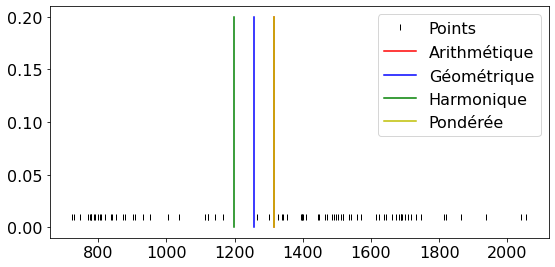

In [6]:
import numpy as np
import matplotlib.pyplot as plt
X = np.loadtxt("./data/data.csv", delimiter=",")[:,1]


def ArithmeticMean(X):
    # calculable directement avec np.mean(X)
    return float(sum(X)) / len(X)

def GeometricMean(X):
    n=len(X)
    p=1 
    for i in range(n):
        p*=X[i] 
    return float(p**(1/n))

def HarmonicMean(X):
    n=len(X)
    s=0
    for i in range(n):
        s += 1/X[i] 
    return len(X) / s

def WeightedMean(X):
    # Exemples de poids
    w = np.random.rand(len(X))
    return np.average(X,weights=w)


plt.figure(figsize=(8,4))
plt.rcParams['font.size'] = '16'
plt.plot(X, [0.01]*len(X), '|', color='k',label='Points')
for method, style, title in ((ArithmeticMean,'r','Arithmétique'),(GeometricMean,'b','Géométrique'),
                             (HarmonicMean,'g','Harmonique'),(WeightedMean,'y', 'Pondérée')):
    m=method(X)
    print (method.__name__, " : ",m)
    plt.plot([m,m],[0,0.2],style,label=title)
plt.legend()
plt.tight_layout()
plt.show()

````{prf:definition} Médiane
La médiane, notée $x_\frac{1}{2}$ est la valeur centrale de la série statistique triée par ordre croissant. 
````

En d'autres termes, c'est la valeur de la série triée telle qu'au moins 50\% des effectifs soient inférieurs à $x_\frac{1}{2}$. Elle peut être calculée sur des variables quantitatives ou qualitatives ordinales (dans le cas où des échelles de valeur ont été définies).
````{prf:definition} Quantiles
Le quantile d'ordre $p$ est défini par $x_p=F^{-1}(p)$, où $F$ est la fonction de répartition. 
````

La notion de quantile généralise la notion de médiane. Si la fonction de répartition était continue et strictement croissante, la définition de $x_p$ serait unique. Or $F$ est discontinue et définie par paliers et les valeurs de quantiles varient suivant par exemple l'utilisation ou non d'une méthode d'interpolation de $F$. Pour calculer $x_p$, on peut par exemple considérer que si $np$ est pair, 
$x_p=\frac{x_{np}+x_{np+1}}{2}$
on remarque alors que la médiane est le quantile d'ordre $\frac{1}{2}$
et sinon
$x_p=x_{\lceil{np}\rceil}$
En particulier, un quartile est chacune des 3 valeurs qui divisent les données triées en 4 parts égales, de sorte que chaque partie représente 1/4 de l'échantillon de population. On note $Q_i$ le $i^e$ quartile.

quartile  25  :  905.9190521240237
quartile  50  :  1399.66320800781
quartile  75  :  1626.326538085935


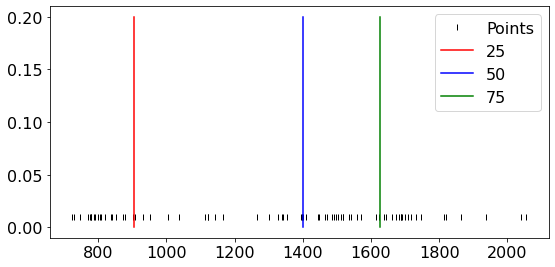

In [7]:
import numpy as np
import matplotlib.pyplot as plt
X = np.loadtxt("./data/data.csv", delimiter=",")[:,1]

plt.figure(figsize=(8,4))
plt.rcParams['font.size'] = '16'
plt.plot(X, [0.01]*len(X), '|', color='k',label='Points')
    
for q, style  in ((25,'r'),(50,'b'),(75,'g')):
    m=np.percentile(X,q)
    print ("quartile ", q, " : ",m)
    plt.plot([m,m],[0,0.2],style,label=q)
plt.legend()
plt.tight_layout()

### Paramètres de dispersion
Il est très souvent utile d'apprécier la dispersion des mesures autour du paramètre de position. Pour cela, sur des variables quantitatives uniquement, plusieurs outils sont disponibles :
````{prf:definition} Etendue
L'étendue est la simple différence entre la plus grande et la plus petite valeur observée.
````


````{prf:definition}  Déviation maximale
La déviation maximale est définie par 
   $ maxdev(X) = max \{ |x_i - \bar{x}| \,|\, i\in[\![1,n]\!]\}$
````


````{prf:definition}  Déviation moyenne absolue
La déviation moyenne absolue est définie par 
   $ mad(X) = \frac{1}{n} \displaystyle\sum_{i=1}^n |x_i - \bar{x}|$
````



````{prf:definition} Distance interquartile
La distance interquartile $Q_3-Q_1$ est la différence entre le troisième et le premier quartile. C'est une statistique robuste aux points aberrants.
````

````{prf:definition} Variance
La variance est la somme des carrés des écarts à la moyenne, normalisée par le nombre d'observations
$\sigma^2 = \frac{1}{n}\displaystyle\sum_{i=1}^n\left (x_i-\bar{x}\right )^2$
````
Cette variance est dite biaisée. La variance non biaisée est obtenue en divisant non pas par $n$, mais par $n-1$.

````{prf:definition} Ecart type
L'écart type est la racine carrée de la variance. 
````

````{prf:definition} Ecart moyen absolu
L'écart moyen absolu est la somme des valeurs absolues des écarts à la moyenne divisée par le nombre d'observations. 
````
Notons qu'il s'agit de la distance $L_1$ du vecteur des observations au vecteur composé de la valeur moyenne, divisé par le nombre d'observations. La variance est la distance $L_2$ entre ces deux vecteurs. Lorsque la distance est calculée par rapport au vecteur composé de la valeur médiane, on parle d'écart médian absolu.


![](./images/dispersion.png)

max_dev  :  1316.3086347078017 +/- 738.0729570890783
mad  :  1316.3086347078017 +/- 327.4656915004233
sigma  :  1316.3086347078017 +/- 374.5723639541368
IQR  :  1316.3086347078017 +/- 720.4074859619113


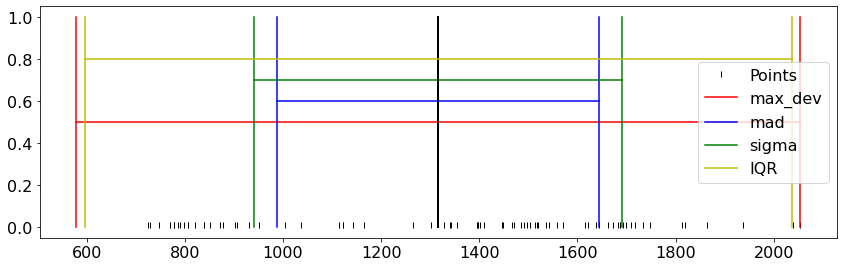

In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt
X = np.loadtxt("./data/data.csv", delimiter=",")[:,1]

def max_dev(X):
    m = np.mean(X)
    return max(abs(x - m) for x in X)

def mad(X):
    m = np.mean(X)
    return sum(abs(x - m) for x in X) / float(len(X))

def sigma(X):
    m = np.mean(X)
    return math.pow(sum((x - m)**2 for x in X) / len(X), 0.5)

def IQR(X): return np.percentile(X,75) - np.percentile(X,25)

plt.figure(figsize=(12,4))
plt.rcParams['font.size'] = '16'
plt.plot(X, [0.01]*len(X), '|', color='k',label='Points')
m = np.mean(X)
for method, pos,style,  in ((max_dev,0.5,'r'),(mad,0.6,'b'),(sigma,0.7,'g'),(IQR,0.8,'y')):
    s=method(X)
    print (method.__name__, " : ",m, "+/-",s)
    plt.plot([m,m],[0,1],'black' )
    plt.plot([m-s,m-s],[0,1],style,label=method.__name__)
    plt.plot([m+s,m+s],[0,1],style)
    plt.plot([m-s,m+s],[pos,pos],style)
plt.legend(loc='best')
plt.tight_layout()


### Paramètres de forme
Les paramètres de forme sont souvent calculés en référence à la forme de la loi normale, pour évaluer la symétrie, l'aplatissement ou la dérive par rapport à cette loi.
````{prf:definition} Skewness
$$g_1 = \frac{m_3}{\sigma^3}$$
````
Le skewness est également appelé coefficient d'asymétrie de Fisher.
````{prf:definition} Kurtosis
$$K=\frac{m_4}{m_2^2}$$
````
$K$ permet de mesurer l'aplatissement.
````{prf:definition} Coefficient d'asymétrie de Yule
$$A_Y = \frac{x_{3/4}+x_{1/4}-2x_{1/2}}{x_{3/4}-x_{1/4}}$$
````
Ce coefficient est fondé sur les positions de trois quartiles (le premier, la médiane et le troisième) et est normalisé par la distance interquartile.
````{prf:definition} Coefficient d'asymétrie de Pearson
$$A_P = \frac{\bar{x}-x_M}{\sigma}$$
````
Ce coefficient est fondé sur la comparaison de la moyenne et du mode, et est normalisé par l'écart type.


Tous les coefficients d'asymétrie ont des propriétés similaires : ils sont nuls si la distribution est symétrique, négatifs si la distribution est allongée à gauche (left asymmetry), et positifs si la distribution est allongée à droite (right asymmetry).


On peut aussi chercher à mesurer l'aplatissement (ou kurtosis) d'une distribution de mesure. Dans ce cas, on utilise le coefficient d'aplatissement de Pearson ou de Fisher, respectivement donnés par 
$\beta_2=\frac{m_4}{\sigma^4}\quad\textrm{et}\quad g_2=\beta_2-3$


Une distribution est alors dite :
- mésokurtique si $g_2$ est proche de 0
- leptokurtique si $g_2>0$ (queues plus longues et distribution plus pointue)
- platykyrtique si $g_2<0$ (queues plus courtes et distribution arrondie).



(boxplot)=
#### Pour résumer
Les principales statistiques d'une série statistique peuvent être résumées dans des **boîtes à moustache**, qui permettent de voir sur un même graphique :

- la médiane
- une boîte entre les premier et le troisième quartile
- l'étendue 
- les points aberrants.


Ce mode de représentation consiste à dessiner une boîte dont les extrémités dépendent du premier et du troisième quartiles $Q_1$ et $Q_3$ , en ajoutant une barre à l’intérieur
matérialisant le second quartile  $Q_2$ (la valeur médiane de l’échantillon). A cette boîte, on ajoute des “moustaches” dont les extrémités dépendent :
- soit des valeurs extrémales prises par l’échantillon (minimum et maximum);
- soit de la plus petite et de la plus grande valeur de l’échantillon appartenant à l’intervalle $[Q_1 -\delta, Q_3+\delta ]$. La grandeur $\delta$ est une mesure de la dispersion des données. Généralement, on utilise $\delta = 1.5(Q_3-Q_1)$. 

Les valeurs de l’ échantillon en dehors des moustaches sont parfois matérialisées par des points et sont alors considérées comme les points aberrants de l'échantillon.

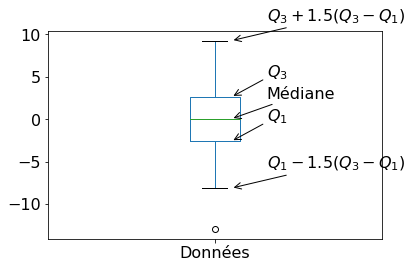

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def annotate_boxplot(bpdict, annotate_params=None,
                     x_offset=0.05, x_loc=0,
                     text_offset_x=35,
                     text_offset_y=20):

    if annotate_params is None:
        annotate_params = dict(xytext=(text_offset_x, text_offset_y), textcoords='offset points', arrowprops={'arrowstyle':'->'})

    plt.annotate('Médiane', (x_loc + 1 + x_offset, bpdict['medians'][x_loc].get_ydata()[0]), **annotate_params)
    plt.annotate('$Q_1$', (x_loc + 1 + x_offset, bpdict['boxes'][x_loc].get_ydata()[0]), **annotate_params)
    plt.annotate('$Q_3$', (x_loc + 1 + x_offset, bpdict['boxes'][x_loc].get_ydata()[2]), **annotate_params)
    plt.annotate('$Q_1-1.5(Q_3-Q_1)$', (x_loc + 1 + x_offset, bpdict['caps'][x_loc*2].get_ydata()[0]), **annotate_params)
    plt.annotate('$Q_3+1.5(Q_3-Q_1)$', (x_loc + 1 + x_offset, bpdict['caps'][(x_loc*2)+1].get_ydata()[0]), **annotate_params)


df = pd.DataFrame({'Données': np.random.normal(scale=4, size=150)})

bpdict = df.boxplot(grid=False,whis=1.5, return_type='dict')
annotate_boxplot(bpdict, x_loc=0)
plt.tight_layout()
plt.show()

### La description ne fait pas tout...
La description d'un ensemble de valeurx $x_j$ par la moyenne, la variance, voire le comportement linéaire (coefficient de corrélation, voir plus loin) peut ne pas suffire à comprendre la distribution des données. Un exemple classique (analyse bivariée, section suivante) est le quartet d'Anscombe (figure ci-dessous), constitué de quatre ensembles de points  $(x,y)\in\mathbb{R}^2$ de même propriétés statistiques (moyenne, variance, coefficient de régression linéaire) mais qui sont distribués de manière totalement différente dans le plan.

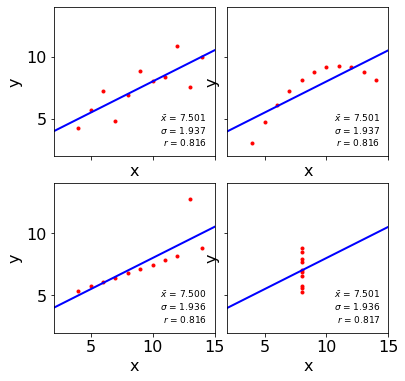

In [10]:
import matplotlib.pyplot as plt
import numpy as np

x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {
    '1.': (x, y1),
    '2.': (x, y2),
    '3.': (x, y3),
    '4.': (x4, y4)
}

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 6),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.18})
axs[0, 0].set(xlim=(2, 15), ylim=(2, 14))

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.plot(x, y, '.',c='r')

    p1, p0 = np.polyfit(x, y, deg=1)  # slope, intercept
    ax.axline(xy1=(0, p0), slope=p1, color='b', lw=2)

    stats = (f'$\\bar x$ = {np.mean(y):.3f}\n'
             f'$\\sigma$ = {np.std(y):.3f}\n'
             f'$r$ = {np.corrcoef(x, y)[0][1]:.3f}')
    ax.text(0.95, 0.07, stats, fontsize=9, 
            transform=ax.transAxes, horizontalalignment='right')
plt.show()


## Statistique descriptive bivariée
On s'intéresse à deux variables $x$ et $y$, mesurées sur les $n$ unités d'observation. La série statistique est alors une suite de $n$ couples $(x_i,y_i)$ des valeurs prises par les deux variables sur chaque individu.

### Cas de deux variables quantitatives
Le couple est un couple de valeurs numériques. C'est donc un point dans le plan $\mathbb{R}^2$. Les variables $x$ et $y$ peuvent être analysées séparément, en opérant une statistique univariée sur chacune de ces variables. Les paramètres calculés (de position, de dispersion...) sont dits marginaux. Cependant, il est intéressant d'étudier le lien entre ces deux variables, par l'intermédiaire des valeurs des couples. On définit pour cela un certain nombre d'outils :
````{prf:definition} Covariance
La covariance de $x$ et $y$ est définie par :
$\sigma_{xy}=\frac{1}{n}\displaystyle\sum_{i=1}^n\left (x_i-\bar{x}\right )\left (y_i-\bar{y}\right )$
````

```{index} Corrélation ; coefficient
```

```{index} Détermination ; coefficient
```

````{prf:definition} Coefficient de corrélation
Le coefficient de corrélation  de deux variables $x$ et $y$ est défini par 
$r_{xy}=\frac{\sigma_{xy}}{\sigma_{x}\sigma_{y}}$.
Le coefficient de détermination est le carré du coefficient de corrélation.
```` 
Le coefficient de corrélation est donc la covariance normalisée par les écarts types marginaux des variables. Il mesure la dépendance linéaire entre $x$ et $y$. Il est compris dans l'intervalle [-1,1] est est positif (resp. négatif) si les points sont alignés le long d'une droite croissante (resp. décroissante), d'autant plus grand en valeur absolue que la dépendance linéaire est vérifiée. Dans le cas où le coefficient est nul, il n'existe pas de dépendance linéaire.

Pour connaître plus précisément la relation linéaire qui lie $x$ et $y$, on effectue une régression linéaire en calculant par exemple la droite de régression : si $y=a+bx$, il est facile de montrer que 
$b=\frac{\sigma_{xy}}{\sigma_x^2}\quad\textrm{et}\quad a=\bar{y}-b\bar{x}$

et la droite de régression s'écrit $y-\bar{y}=\frac{\sigma_{xy}}{\sigma_x^2}\left ( x-\bar{x}\right )$.

A partir de cette droite, on peut calculer les valeurs ajustées, obtenues à partir de la droite de régression : $y^*_i=a+bx_i$. Ce sont les valeurs théoriques des $y_i$ et les résidus $e_i=y_i-y_i^*$ représentent la partie inexpliquée des $y_i$ par la droite de régression (ceux là même que l'on essaye de minimiser par la méthode des moindres carrés). Nous reviendrons dans le chapitre sur la régression sur l'analyse de ces résidus.

### Cas de deux variables qualitatives

Le couple est un couple de valeurs $(x_i,y_i)$ où $x_i$ et $y_i$ prennent comme valeurs des modalités qualitatives. Notons $x_1\cdots x_J$ et $y_1\cdots y_K$ les valeurs distinctes prises. 

Les données peuvent être regroupées sous la forme d'un **tableau de contingence** prenant la forme suivante :
```{index} Tableau ; contingence
```
```{index} Contingence ; tableau
```

$\begin{array}{c|ccccc|c}
&y_1&\cdots&y_k&\cdots&y_K&total\\
\hline
x_1&n_{11}&\cdots&n_{1k}&\cdots&n_{1K}&n_{1.}\\
\vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots\\
x_j&n_{j1}&\cdots&n_{jk}&\cdots&n_{jK}&n_{j.}\\
\vdots&\vdots&\vdots&\vdots&\vdots&\vdots&\vdots\\
x_J&n_{J1}&\cdots&n_{Jk}&\cdots&n_{JK}&n_{J.}\\
\hline
total&n_{.1}&\cdots&n_{.k}&\cdots&n_{.K}&n\\
\end{array}
$

où $n_{j.}$ (resp $n_{.k}$ )sont les effectifs marginaux représentant le nombre de fois où $x_j$ (resp. $y_k$) apparaît, et $n_{jk}$ le nombre d'apparition du couple $(x_j,y_k)$.

Le tableau des fréquences $f_{jk}$ s'obtient en divisant tous les effectifs par la taille $n$ dans ce tableau.

Un tel tableau s'interprète toujours en comparant les fréquences en lignes ou les fréquences en colonnes (profils lignes ou colonnes), définies  respectivement par 
$f_k^{(j)}= \frac{n_{jk}}{n_{j.}}=\frac{f_{jk}}{f_{j.}}\quad\textrm{ et }\quad f_j^{(k)}= \frac{n_{jk}}{n_{.k}}=\frac{f_{jk}}{f_{.k}}$

Si l'on cherche un lien entre les variables, on construit un tableau d'effectifs théoriques qui représente la situation où les variables ne sont pas liées (indépendance). Ce tableau est constitué des effectifs 
$n_{jk}^*=\frac{n_{j.}n_{.k}}{n}$
Les effectifs observés $n_{jk}$ ont les mêmes marges que les $n_{jk}^*$, et les écarts à l'indépendance sont calculés par la différence $e_{jk}=n_{jk}-n_{jk}^*$

```{index} Khi-deux
```

La dépendance du tableau se mesure au moyen du khi-deux défini par 
$\chi^2_{obs}= \displaystyle\sum_{k=1}^K\displaystyle\sum_{j=1}^J\frac{e_{jk}^2}{n_{jk}^*}$
qui peut être normalisé pour ne plus dépendre du nombre d'observations :
$\phi^2=\frac{\chi^2_{obs}}{n}$

La construction du tableau des effectifs théoriques et sa comparaison au tableau des observations permet dans un premier temps de mettre en évidence les associations significatives entre modalités des deux variables. Pour cela, on calcule la contribution au $\chi^2$ des modalités $j$ et $k$ :

$$\frac{1}{\chi^2_{obs}}\frac{\left (n_{jk}-n_{j.}n_{.k}\right )^2}{n_{jk}^*}$$

Le signe de la différence $n_{jk}-n_{jk}^*$ indique alors s'il y a une association positive ou négative entre les modalités $j$ et $k$.

Plus généralement, le $\chi^2_{obs}$ est un indicateur de liaison entre les variables.  Dans le cas où $\chi^2_{obs}=0$, il y a indépendance. Pour rechercher la borne supérieure du khi-deux et voir dans quel cas elle est atteinte, on développe le carré et on obtient 

$$\chi^2_{obs} = n\left [\displaystyle\sum_{k=1}^K\displaystyle\sum_{j=1}^J \frac{n_{jk}^2}{n_{j.}n_{.k}} -1\right ]$$

Comme $\frac{n_{jk}}{n_{.k}}\leq 1$ on a $ \frac{n_{jk}^2}{n_{j.}n_{.k}} \leq \frac{n_{jk}}{n_{.k}}$ d'où

$$\displaystyle\sum_{k=1}^K\displaystyle\sum_{j=1}^J\frac{n_{jk}^2}{n_{j.}n_{.k}}\leq \displaystyle\sum_{k=1}^K\displaystyle\sum_{j=1}^J \frac{n_{jk}}{n_{.k}} = \displaystyle\sum_{k=1}^K \frac{\displaystyle\sum_{j=1}^J n_{jk}}{n_{.k}}=\displaystyle\sum_{k=1}^K \frac{n_{.k}}{n_{.k}}=1$$

d'où $\chi^2_{obs}\leq n(K-1)$. On pourrait de même montrer que $\chi^2_{obs}\leq n(J-1)$ et donc $\phi^2\leq min(J-1,K-1)$.

La borne est atteinte dans le cas de la dépendance fonctionnelle (si $\forall j \frac{n_{jk}}{n_{j.}}=1$, i.e. il n'existe qu'une case non nulle dans chaque ligne.)

A partir de ce khi-deux normalisé, on calcule finalement plusieurs coefficients permettant de mesurer l'indépendance, et parmi ceux-ci citons :

- le coefficient de Cramer:
$V=\sqrt{\frac{\phi^2}{min(J-1,K-1)}}$
- le coefficient de contingence de Pearson :
$C = \sqrt{\frac{\phi^2}{\phi^2 + 1}}$
- le coefficient de Tschuprow :
$T = \sqrt{\frac{\phi^2}{\sqrt{(K-1)(J-1)}}}$


Ces coefficients sont tous compris entre 0 (indépendance) et 1 (dépendance fonctionnelle). Pour estimer à partir de quelle valeur la dépendance fonctionnelle est significative, on procède de la manière suivante : si les $n$ observations étaient prélevées dans une population où les variables sont indépendantes, on recherche les valeurs probables de $\chi^2_{obs}$.

En s'appuyant sur la loi multinomiale et le test du $\chi^2$, on montre que $\chi^2_{obs}$ est une réalisation d'une variable aléatoire $Z$ suivant approximativement une loi $\chi^2_{(K-1)(J-1)}$. 


```{prf:remark}
:class: dropdown
Soient $U_1\ldots U_p$ $p$ variables i.i.d de loi normale centrée réduite. On appelle loi du $\chi^2$ à $p$ degrés de liberté la loi de la variable $\displaystyle\sum_{i=1}^pU_i^2$.
```


En effet, les $e_{jk}$ sont liées par $(K-1)(J-1)$ relations linéaires puisqu'on estime les probabilités de réalisation de $x_j$ et $y_k$ respectivement par $n_{j,.}/n$ et $n_{.k}/n$. Il suffit alors de fixer un risque d'erreur $\alpha$ (une valeur qui, s'il y avait indépendance, n'aurait qu'une probabilité faible d'être dépassée), et on rejette l'hypothèse d'indépendance si $\chi^2_{obs}$  est supérieur à la valeur critique qu'une variable $\chi^2_{(K-1)(J-1)}$ a une probabilité $\alpha$ de dépasser.
L'espérance d'un $\chi^2_{(K-1)(J-1)}$ étant égale à son degré de liberté, $\chi^2_{obs}$ est d'autant plus grand que le nombre de modalités $J$ et/ou $K$ est grand. 


D'autres indices existent, qui ne dépendent pas de $\chi^2_{obs}$, comme par exemple

$\begin{equation} G^2 = 2\displaystyle\sum_{k=1}^K\displaystyle\sum_{j=1}^J n_{jk} ln \left (\frac{ n_{jk}}{ n^*_{jk}} \right )\end{equation}$

qui sous l'hypothèse d'indépendance suit une loi $\chi^2_{(K-1)(J-1)}$.

### Cas d'une variable quantitative et d'une variable qualitative
On s'intéresse ici au cas où les modalités $x_i$ sont qualitatives, et où $y$ est une variable quantitative, dont les modalités sont des réalisations d'une variable aléatoire $Y$.
Le rapport de corrélation théorique entre $x$ et $Y$ est défini par 

$$\eta^2_{Y\mid x} = \frac{\sigma^2_{\mathbb{E}_{Y\mid x}}}{\sigma^2_Y}$$

Si $n_j$ est le nombre d'observations de la modalité $x_j,j\in[\![1\,J]\!]$, $y_{ij}$ la valeur de $Y$ du $i^e$ individu de la modalité $j$, $\bar{y}_1\ldots \bar{y}_J$ sont les moyennes de $Y$ pour ces modalités et $\bar{y}$ la moyenne totale sur les $n$ individus, le rapport de corrélation empirique est défini par 


$$e^2 = \frac{\frac{1}{n}\displaystyle\sum_{j=1}^J n_j\left (\bar{y}_j-\bar{y}\right )^2}{\sigma^2_y}$$


La quantité 

$\sigma^2_\cap = \frac{1}{n}\displaystyle\sum_{j=1}^J n_j\sigma_j^2$

 avec $\sigma_j^2 =  \frac{1}{n_j}\displaystyle\sum_{i=1}^{n_j}\left (y_{ij}-\bar{y}_j \right )^2$,  est appelée variance intra groupe (ou intra classe), et donne une idée de la variabilité à l'intérieur de chaque modalité. 
 La quantité 
 $\sigma_\cup = \frac{1}{n}\displaystyle\sum_{j=1}^J n_j\left (\bar{y}_j-\bar{y}\right )^2$
 est la variance inter groupes (ou inter classes), et mesure la variabilité entre les différentes modalités.

 Le théorème de décomposition de la variance (ou théorème de Huygens) affirme que la variance totale $\sigma^2_y$, calculée sans distinction de modalité s'écrit :
 $\sigma^2_y = \sigma^2_\cap + \sigma^2_\cup$
 
 De ces définitions, on a alors :

- $e^2=0$ si toutes les moyennes de $Y$ sont égales, d'où l'absence de dépendance en moyenne
- $e^2=1$ si tous les individus d'une modalité de $x$ ont même valeur de $Y$ et ceci pour chaque modalité 
- $e^2$ permet de comprendre, via le théorème de Huygens,  quelle variation est prédominante dans la variance totale. Ainsi par exemple, si la variable quantitative est la note d'un élève à un examen, et la variable qualitative son assiduité au cours correspondant, la variabilité entre les notes obtenues dans toute la promotion dépend de deux
facteurs : le fait que les étudiants assistent ou pas aux cours, et le fait qu'à assiduité
égale (i.e. à l'intérieur d'une même modalité d'assiduité) les étudiants n'ont pas le même niveau. $e^2$  permet alors de savoir lequel de ces deux facteurs est prédominant
pour expliquer la variabilité des notes dans toute la promotion.


Pour déterminer à partir de quelle valeur $e^2$ est significatif, on compare donc $\sigma^2_\cap$ à $\sigma^2_\cup$. On peut montrer que si le rapport de corrélation théorique est nul, alors la variable $\frac{\left (\frac{e^2}{J-1}\right )}{\left (\frac{1-e^2}{n-J}\right )}$ suit une loi de Fisher Snedecor, en supposant que les distributions conditionnelles de $Y$ pour chaque modalité de $X$ sont gaussiennes, de même espérance et de même variance. 

```{prf:remark}
:class: dropdown
Soient $U$ et $V$ deux variables aléatoires indépendantes suivant respectivement des lois $\chi^2_n$ et $\chi^2_p$. On définit la loi de Fisher Snedecor par $F(n,p)=\frac{U/n}{V/P}$) $F(J-1,n-J)$
```

## Vers une analyse multivariée
Bien évidemment, dans la majorité des cas, un individu sera décrit par $p\geq 2$ variables. Si certains algorithmes de statistique descriptive multidimensionnelle sont abordés dans ce cours, il est néanmoins possible d'avoir une première approche exploratoire de ce cas.

### Matrices de covariance et de corrélation
La première idée, lorsque l'on a observé $d$ variables sur $n$ individus, est de calculer les $d$ variances de ces variables, et les $\frac{p(p-1)}{2}$ covariances. Ces mesures sont regroupées dans une matrice $p\times p$, symétrique, semi définie positive, appelée matrice de variance-covariance (ou matrice des covariances), et classiquement notée $\boldsymbol\Sigma$.

De même, on peut former la matrice des corrélations entre les variables, à diagonale unité et symétrique. La matrice résultante, notée $\mathbf R$, est également semi définie positive et sa représentation graphique en fausses couleurs permet d'apprécier les dépendances linéaires entre variables.


![](./images/batiments.png)


Dans le cas de variables qualitatives, les coefficients de corrélation peuvent être remplacés par les coefficients de Cramer, de Tschuprow...

### Tableaux de nuages
On peut proposer à partir de là des représentations entre sous-ensembles de variables. La figure suivante propose un exemple de tels tableaux, parfois appelés splom (Scatter PLOt Matrix) :

- la partie triangulaire supérieure représente les nuages de points de couples de variables
- la diagonale représente les histogrammes des variables
- la partie trianglaire inférieure donne le coefficient de corrélation entre les deux variables, et une estimation de la densité de la distribution 2D des données


![](./images/batiments2.png)



### Tableaux de Burt
Le tableau de Burt est une généralisation particulière de la table de contingence dans le cas où l'on étudie simultanément $p$ variables qualitatives $X_1\ldots X_p$. Notons $c_j$ le nombre de modalités de $X_j$ et posons $c=\displaystyle\sum_{j=1}^p c_j$. 

```{index} Tableau ; Burt
```
```{index} Burt ; tableau
```

Le tableau de Burt est une matrice carrée symétrique de taille $c$, constituée de $p^2$ sous-matrices. Chacune des $p$ sous-matrices diagonales est relative à l'une des $p$ variables, la $j^e$ étant carrée de taille $c_j$, diagonale, et de coefficients diagonaux les effectifs marginaux de $X_j$. La sous-matrice dans le bloc $(k,l)$ du tableau, $k\neq l$, est la table de contingence des variables $X_k$ et $X_l$.